In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [9]:
x_data = np.linspace(0,10,1000000)

In [10]:
noise = np.random.randn(len(x_data))

In [11]:
y_ture = (0.5 * x_data) + 5 + noise

In [12]:
x_df = pd.DataFrame(data=x_data, columns=['X'])
y_df = pd.DataFrame(data=y_ture, columns=['Y'])

In [13]:
y_df.head()

,Y
0,5.807924
1,1.713676
2,4.736138
3,4.840809
4,4.487025


In [14]:
my_data = pd.concat([x_df,y_df], axis=1)

In [15]:
my_data.head()

,X,Y
0,0.00000,5.807924
1,0.00001,1.713676
2,0.00002,4.736138
3,0.00003,4.840809
4,0.00004,4.487025


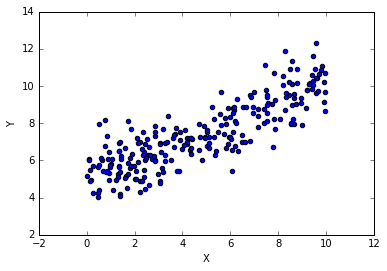

In [16]:
my_data.sample(n=250).plot(kind='scatter',x='X',y='Y')

In [17]:
batch_size = 8
np.random.randn(2)

array([-0.81454823, -0.5398987 ])

In [18]:
m = tf.Variable(-0.65)
b = tf.Variable(-0.56)

In [19]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [20]:
y_model = m * xph + b

In [21]:
type(y_model)

tensorflow.python.framework.ops.Tensor

In [22]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [24]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    for i in range(batches):
        rand_id = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_id], yph:y_ture[rand_id]}
        sess.run(train, feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [26]:
print(model_m, model_b)

(0.52471399, 4.848371)


In [27]:
print(rand_id)

[106643 642256 194970 610252 903334 567770  11731 495928]


In [28]:
#TF estimator

In [29]:
feat_col = [ tf.feature_column.numeric_column('x',shape=[1])]

In [30]:
eastimator = tf.estimator.LinearRegressor(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpku9bSx', '_save_summary_steps': 100}


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_ture, test_size=0.3,random_state = 101)

In [34]:
print(x_train.shape)

(700000,)


In [35]:
print(x_eval.shape)

(300000,)


In [37]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)
